# The NarWolves: DC vs Marvel Data Analysis

## Loading libraries and importing DC vs. Marvel data

The dataset was obtained from [Kaggle](https://www.kaggle.com/hetulmehta/marvel-vs-dc-imdb-dataset). The dataset first cleaned and processed in this [notebook](https://github.com/nguyenjenny/spark_shared_repo/blob/main/group_02/CleanData.ipynb).

In [1]:
# Import libraries
import numpy as np # For math- and matrix-based functions
import pandas as pd # For DataFrame functionality
import seaborn as sns # For plotting/ data visualization
from sklearn.model_selection import train_test_split # For the train_test_split_function
import statsmodels.formula.api as smf # Stats models for  

# Figure size settings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,7)

# Get path of data (where it is located on GitHub)
path = "https://raw.githubusercontent.com/nguyenjenny/spark_shared_repo/main/group_02/Marvel_DC_imdb_cleaned.csv"

# Load the data into a DataFrame
hero = pd.read_csv(path)

# Show DataFrame
hero

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
0,Avengers: Endgame,(2019),"Action,Adventure,Drama",181.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",After the devastating events of Avengers: Infi...,8.4,78.0,880911.0,858.37,Marvel,2019.0,NaN,Movie
1,Guardians of the Galaxy,(2014),"Action,Adventure,Comedy",121.0,PG-13,JamesGunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",A group of intergalactic criminals must pull t...,8.0,76.0,1066222.0,333.18,Marvel,2014.0,NaN,Movie
2,Spider-Man: Far from Home,(2019),"Action,Adventure,Sci-Fi",129.0,PG-13,JonWatts,"TomHolland,SamuelL.Jackson,JakeGyllenhaal,Mari...",Following the events of Avengers: Endgame (201...,7.5,69.0,348047.0,390.53,Marvel,2019.0,NaN,Movie
3,Thor: Ragnarok,(2017),"Action,Adventure,Comedy",130.0,PG-13,TaikaWaititi,"ChrisHemsworth,TomHiddleston,CateBlanchett,Mar...","Imprisoned on the planet Sakaar, Thor must rac...",7.9,74.0,615860.0,315.06,Marvel,2017.0,NaN,Movie
4,Avengers: Infinity War,(2018),"Action,Adventure,Sci-Fi",149.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",The Avengers and their allies must be willing ...,8.4,68.0,881638.0,678.82,Marvel,2018.0,NaN,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,DC's Legends of Tomorrow,(2016– ),"Action,Adventure,Drama",42.0,TV-14,GregorySmith,"BrandonRouth,CaityLotz,MaisieRichardson-Seller...","Worlds lived, worlds died. Nothing will ever b...",8.5,NaN,2050.0,NaN,DC,2016.0,NaN,TV Show
1199,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,CarlSeaton,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...","In the wake of Lex Luthor's return, the show f...",8.3,NaN,1259.0,NaN,DC,2015.0,2021.0,TV Show
1200,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,AlexisOstrander,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara comes face to face with Red Daughter and ...,8.1,NaN,1053.0,NaN,DC,2015.0,2021.0,TV Show
1201,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,ShannonKohli,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara and Lena head to Kaznia to hunt down Lex....,7.4,NaN,1036.0,NaN,DC,2015.0,2021.0,TV Show


# Analyzing data

## Getting to Know our Data: Aggregates and Basic Stats

### Basic statistics

We can use the `.describe()` function to get basic information about our numerical data.

In [2]:
# Use the `.describe()` to get information on the hero DataFrae

hero.describe()

,RunTime,IMDB_Score,Metascore,Votes,USA_Gross,Year_Start,Year_End
count,1187.000000,1203.000000,63.000000,1.203000e+03,64.000000,1203.000000,967.000000
mean,40.534962,7.992851,61.539683,2.863801e+04,230.832500,2006.534497,2010.095140
std,23.542099,0.836888,14.506756,1.511395e+05,186.083285,7.929563,8.250055
min,10.000000,3.400000,27.000000,5.000000e+00,0.530000,1978.000000,1995.000000
25%,22.000000,7.600000,53.500000,4.260000e+02,97.220000,2001.000000,2004.000000
50%,42.000000,8.100000,64.000000,1.005000e+03,192.055000,2004.000000,2011.000000
75%,43.000000,8.600000,71.000000,2.137000e+03,333.435000,2014.000000,2019.000000
max,181.000000,9.600000,88.000000,2.361064e+06,858.370000,2021.000000,2021.000000


### Mean IMDB_Score

We can use the `.mean()` function to get information about the average `"IMDB_Score"`

First, we need to select the column of the DataFrame that we want. 


We can use `.iloc[:, "column_name" ]` or we can use the short form of just `["column"]`

In [3]:
# Use loc to select the `"IMBD_Score"`
hero.loc[:, "IMDB_Score"]

0       8.4
1       8.0
2       7.5
3       7.9
4       8.4
       ... 
1198    8.5
1199    8.3
1200    8.1
1201    7.4
1202    7.5
Name: IMDB_Score, Length: 1203, dtype: float64

In [4]:
# Use the short hand version ["column"] to get the "IMBD_Score"

hero['IMDB_Score'].mean()


7.992851205320039

The mean IMDB score for both Marvel and DC movies is **7.99**. 

### Lowest and Highest IMDB_Score

We can use the `.min()` function to get information about the lowest `"IMDB_Score"` and `.max()` to get the highest `"IMDB_Score"` for comic/superhero movies. 



In [5]:
# Get min/lowest IMBD_Rating
hero["IMDB_Score"].min()

3.4

In [6]:
# Get max/highest IMBD_Rating
hero["IMDB_Score"].max()


9.6

The IMDB scores for both Marvel and DC movies range from **3.4** to **9.6**. 

### Standard Deviation of IMDB_Scores

Standard deviation represents the spread or variability of the data.

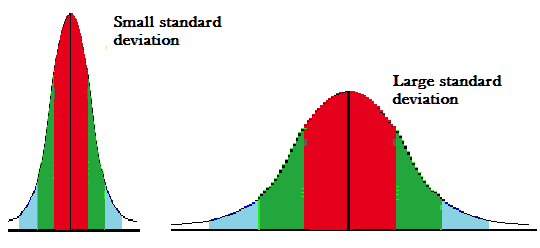

↑ stdev = ↑ variability 

We can use the `.std()` function to get the standard deviation of the `"IMDB_Score"`.


In [7]:
hero["IMDB_Score"].std()

0.836887964144891

In [8]:
std = hero["IMDB_Score"].std()
mean = hero["IMDB_Score"].mean()

print(f'Most scores are around {mean-std} to {mean+std}')

Most scores are around 7.155963241175148 to 8.82973916946493


The standard deviation of the IMDB scores for both Marvel and DC movies is **0.836**. 

### Mean Run Time of Movies and TV Series

In [9]:
# Calculate mean run time of the movies and tv series in this data using the `"RunTime"` column 

hero['RunTime'].mean()

40.534962089300755

The mean run time is **40.5**. 

### Finding the highest grossing films (movies & TV shows) in the US using  `.sort_values()`

We can sort our data set by a column by using the function called `.sort_values()`.

We simply pass the name of the column we want to sort by as a parameter.

- We can also set the parameter `ascending=True` or `ascending=False` if we want to sort by increasing or descreasing values
    - `ascending=True`: Values are sorted from lowest to largest
    - `ascending=False`: Values are sorted from largest to lowest

The format for `.sort_values()` looks like this:

```
    hero.sort_values("column_name", ascending=False)
```

In [10]:
# Sort the hero DataFrame by `"USA_Gross"` and make `ascending=False`
hero.query('Type == "Movie" & Category == "DC"').sort_values("USA_Gross", ascending=False).iloc[[0, 1, -2, -1]]


,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
237,The Dark Knight,(2008),"Action,Crime,Drama",152.0,PG-13,ChristopherNolan,"ChristianBale,HeathLedger,AaronEckhart,Michael...",When the menace known as the Joker wreaks havo...,9.0,84.0,2361064.0,534.86,DC,2008.0,NaN,Movie
240,The Dark Knight Rises,(2012),"Action,Adventure",164.0,PG-13,ChristopherNolan,"ChristianBale,TomHardy,AnneHathaway,GaryOldman",Eight years after the Joker's reign of anarchy...,8.4,78.0,1547852.0,448.14,DC,2012.0,NaN,Movie
260,Clerks,(1994),Comedy,92.0,R,KevinSmith,"BrianO'Halloran,JeffAnderson,MarilynGhigliotti...",A day in the lives of two convenience clerks n...,7.7,70.0,213527.0,3.15,DC,1994.0,NaN,Movie
268,Being Flynn,(2012),Drama,102.0,R,PaulWeitz,"PaulDano,RobertDeNiro,JulianneMoore,OliviaThirlby","Working in a Boston homeless shelter, Nick Fly...",6.4,53.0,16695.0,0.53,DC,2012.0,NaN,Movie


In [11]:
# Sort the hero DataFrame by `"USA_Gross"` and make `ascending=False`
hero.query('Type == "Movie" & Category == "Marvel"').sort_values("USA_Gross", ascending=False).iloc[[0, 1, -2, -1]]

,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
0,Avengers: Endgame,(2019),"Action,Adventure,Drama",181.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",After the devastating events of Avengers: Infi...,8.4,78.0,880911.0,858.37,Marvel,2019.0,NaN,Movie
5,Black Panther,(2018),"Action,Adventure,Sci-Fi",134.0,PG-13,RyanCoogler,"ChadwickBoseman,MichaelB.Jordan,LupitaNyong'o,...","T'Challa, heir to the hidden but advanced king...",7.3,88.0,652032.0,700.06,Marvel,2018.0,NaN,Movie
15,Brightburn,(2019),"Drama,Horror,Mystery",90.0,R,DavidYarovesky,"ElizabethBanks,DavidDenman,JacksonA.Dunn,Abrah...",What if a child from another world crash-lande...,6.1,44.0,84999.0,17.30,Marvel,2019.0,NaN,Movie
28,Punisher: War Zone,(2008),"Action,Crime,Drama",103.0,R,LexiAlexander,"RayStevenson,DominicWest,JulieBenz,DougHutchison","Frank Castle, known as the Punisher, ruthlessl...",5.9,30.0,60678.0,7.95,Marvel,2008.0,NaN,Movie


The highest grossing film in the US was **Avengers: Infinity War**. It made **$858 million** in the US alone. 

### Finding the highest rated films (movies & TV shows) using `.sort_values()`



In [12]:
# Sort the hero DataFrame by `"IMDB_Score"` and make `ascending=False`
hero.sort_values("IMDB_Score", ascending=False).iloc[[0, 1, -2, -1]]



,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
917,The Flash,(2014– ),"Action,Adventure,Drama",44.0,TV-PG,DermottDowns,"GrantGustin,CandicePatton,DaniellePanabaker,Ri...","With the Particle Accelerator back online, Bar...",9.6,NaN,11823.0,NaN,DC,2014.0,NaN,TV Show
229,Agents of S.H.I.E.L.D.,(2013–2020),"Action,Adventure,Drama",43.0,TV-14,ElizabethHenstridge,"ClarkGregg,Ming-NaWen,ChloeBennet,ElizabethHen...","A time storm ravages the Zephyr, propelling it...",9.6,NaN,2700.0,NaN,Marvel,2013.0,2020.0,TV Show
250,Batman & Robin,(1997),"Action,Sci-Fi",125.0,PG-13,JoelSchumacher,"ArnoldSchwarzenegger,GeorgeClooney,ChrisO'Donn...",Batman and Robin try to keep their relationshi...,3.8,28.0,237323.0,107.33,DC,1997.0,NaN,Movie
264,Catwoman,(2004),"Action,Crime,Fantasy",104.0,PG-13,Pitof,"HalleBerry,SharonStone,BenjaminBratt,LambertWi...","A shy woman, endowed with the speed, reflexes,...",3.4,27.0,112736.0,40.20,DC,2004.0,NaN,Movie


The highest rated film according to the IMDB was **an episode of the Flash**. It was rated **9.6 by 11823 people**. The lowest rated film was a movie called **Catwoman with a rating of 3.4**. 

#### Lowest and Highest Rated DC Movie:

Highest rated DC film is the **Dark Knight** with at IMDB Rating of **9.0**.

Second Highest rated DC film is the **Dark Knight Rises** with at IMDB Rating of **8.4**.

Lowest rated DC film is the **Catwoman** with at IMDB Rating of **3.4**.

Second Lowest rated DC film is the **Batman & Robin** with at IMDB Rating of **3.8**.

In [13]:
# Sort the hero DataFrame by `"IMDB_Score"` and make `ascending=False`
hero.query('Type == "Movie" & Category == "DC"').sort_values("IMDB_Score", ascending=False).iloc[[0, 1, -2, -1]]


,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
237,The Dark Knight,(2008),"Action,Crime,Drama",152.0,PG-13,ChristopherNolan,"ChristianBale,HeathLedger,AaronEckhart,Michael...",When the menace known as the Joker wreaks havo...,9.0,84.0,2361064.0,534.86,DC,2008.0,NaN,Movie
240,The Dark Knight Rises,(2012),"Action,Adventure",164.0,PG-13,ChristopherNolan,"ChristianBale,TomHardy,AnneHathaway,GaryOldman",Eight years after the Joker's reign of anarchy...,8.4,78.0,1547852.0,448.14,DC,2012.0,NaN,Movie
250,Batman & Robin,(1997),"Action,Sci-Fi",125.0,PG-13,JoelSchumacher,"ArnoldSchwarzenegger,GeorgeClooney,ChrisO'Donn...",Batman and Robin try to keep their relationshi...,3.8,28.0,237323.0,107.33,DC,1997.0,NaN,Movie
264,Catwoman,(2004),"Action,Crime,Fantasy",104.0,PG-13,Pitof,"HalleBerry,SharonStone,BenjaminBratt,LambertWi...","A shy woman, endowed with the speed, reflexes,...",3.4,27.0,112736.0,40.20,DC,2004.0,NaN,Movie


####  Lowest and Highest Rated Marvel Movie:

Highest rated Marvel film is the **Avengers: Endgame** with at IMDB Rating of **8.4**.

Second highest rated Marvel film is the **Avengers: Infinity War** with at IMDB Rating of **8.4**.

Lowest rated Marvel film is the **Fantastic Four: Rise of Silver Surfer** with at IMDB Rating of **5.6**.

Second lowest rated Marvel film is the **Punisher: War Zone** with at IMDB Rating of **5.9**.

In [14]:
# Sort the hero DataFrame by `"IMDB_Score"` and make `ascending=False`
hero.query('Type == "Movie" & Category == "Marvel"').sort_values("IMDB_Score", ascending=False).iloc[[0, 1, -2, -1]]

,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
0,Avengers: Endgame,(2019),"Action,Adventure,Drama",181.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",After the devastating events of Avengers: Infi...,8.4,78.0,880911.0,858.37,Marvel,2019.0,NaN,Movie
4,Avengers: Infinity War,(2018),"Action,Adventure,Sci-Fi",149.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",The Avengers and their allies must be willing ...,8.4,68.0,881638.0,678.82,Marvel,2018.0,NaN,Movie
28,Punisher: War Zone,(2008),"Action,Crime,Drama",103.0,R,LexiAlexander,"RayStevenson,DominicWest,JulieBenz,DougHutchison","Frank Castle, known as the Punisher, ruthlessl...",5.9,30.0,60678.0,7.95,Marvel,2008.0,NaN,Movie
27,Fantastic 4: Rise of the Silver Surfer,(2007),"Action,Adventure,Fantasy",92.0,PG,TimStory,"IoanGruffudd,JessicaAlba,ChrisEvans,MichaelChi...",The Fantastic Four learn that they aren't the ...,5.6,45.0,253509.0,131.92,Marvel,2007.0,NaN,Movie


## Comparing DC vs Marvel cinematic universes

The battle of the cinematic universes begins! Who will reign supreme?

### Figuring out the number of Marvel and DC films using `.value_counts()`

The first order of business is figuring out how many of our datapoints are from either Marvel or DC? Are there more Marvel or DC films? 

To do this we need to use `.value_counts()` function. It is important to note that this function can only be applied on a single column of a DataFrame

For example:

```
    hero["column_name"].value_counts()
```

In [15]:
# Figure out how many datapoints are from Marvel or the DC cinematic universe.  Use the column name "Category"
hero["Category"].value_counts()



DC        968
Marvel    235
Name: Category, dtype: int64

Our dataset has **116** films from the DC universe and **276** films from the Marvel universe.|

In [16]:
hero.groupby(["Category", "Type"]).describe()

RunTime                         ... Year_End                
                   count        mean        std  ...      50%     75%     max
Category Type                                    ...                         
DC       Movie      35.0  125.171429  21.633968  ...      NaN     NaN     NaN
         TV Show   917.0   33.872410  11.445050  ...   2011.0  2019.0  2021.0
Marvel   Movie      29.0  126.103448  17.958971  ...      NaN     NaN     NaN
         TV Show   206.0   43.766990   5.620874  ...   2019.0  2020.0  2020.0

[4 rows x 56 columns]

### Figuring out if Marvel or DC films are more highly rated using `.groupby()`

Which movies are more highly rate on IMDB? DC or Marvel?

To answer this question, we need to use the `.groupby()` method. We can select one our multiple columns to group the data by, and then we can aggregate that data to find out information about mean, min, max, standard deviation, sum, etc.

The format that `.groupby()` uses is as follows:

```
hero.groupby("column_name").aggregate_function()
```

Where `"column_name"` is the name of the column and `.aggregate_function()` is the a specific aggregate function like `.mean()`, `.sum()`, `.max()`, `min()`.

In [17]:
# Figure out if DC or Marvel films have a greater average IMDB_Score, Metascore, Votes, USA_Gross.
# Remember the column that tells us is the film is DC or Marvel is called `"Category"``

hero.groupby("Category").mean()

,RunTime,IMDB_Score,Metascore,Votes,USA_Gross,Year_Start,Year_End
Category,,,,,,,
DC,37.228992,8.072831,58.294118,17158.598140,157.236286,2005.572314,2009.159794
Marvel,53.927660,7.663404,65.344828,75923.438298,319.655517,2010.497872,2013.895288


In [18]:
hero.groupby("Category").mean()

,RunTime,IMDB_Score,Metascore,Votes,USA_Gross,Year_Start,Year_End
Category,,,,,,,
DC,37.228992,8.072831,58.294118,17158.598140,157.236286,2005.572314,2009.159794
Marvel,53.927660,7.663404,65.344828,75923.438298,319.655517,2010.497872,2013.895288


**DC** has a higher mean IMDB Score than **Marvel**.  And, **Marvel** has a higher mean Metacritic score than **DC**. In general, **Marvel** films tend to gross more in the US than **DC** films. 

### Grouping by both `"Category"` (i.e., DC vs Marvel) and `"Type"` (i.e., Movie vs Series)

Our dataset also includes information if the film is a stand-alone movie (only one iteration of it) or if it is a series (multiple episodes).

To get a break down of our data by both `"Category"` and `"Type"`, we need to pass two columns into `.groupby()`

The format should be as follows: 

```
hero.groupby(["column_name_1", "column_name_2"]).aggregate_function()
```


In [19]:
# Calculate the mean for the numerical data by grouping by "Category" and "Type"
hero.groupby(["Type", "Category"]).mean()

RunTime  IMDB_Score  ...   Year_Start     Year_End
Type    Category                          ...                          
Movie   DC        125.171429    6.514286  ...  2003.371429          NaN
        Marvel    126.103448    7.210345  ...  2014.344828          NaN
TV Show DC         33.872410    8.131297  ...  2005.654877  2009.159794
        Marvel     43.766990    7.727184  ...  2009.956311  2013.895288

[4 rows x 7 columns]

When comparing **movies**, Marvel had a higher IMDB score than DC.  

When comparing **TV Series**, DC had a higher IMDB rating than Marvel.

### Looking films made after 2005 using `.query()` 


Everyone knows that there was a resurgence in superhero movies in the mid to late 2000s, what if we only look at data after 2005 using

`.query()` to apply some sort of condition onto the data.  Usually the format is you set some sort of condition based on a column of your DataFrame.


Some examples of queries include the following:


- Only include films that were before the year 1995: `hero.query("Year_Start < 1995")`
- Only include films that were directed by Tim Burton: `hero.query("Director == 'TimBurton'")`
- Only include films that have a IMDB score of greater or equal to 8 **and** were made after 2010: `hero.query("IMDB_Score >= 8 & Year_Start > 2010")`
- Only include films that have a age rating of "R" **or** "M": `hero.query("Rating == 'R' | Rating == 'M'")`




In [20]:
# Query that hero data for films where the Year_Start is > 2005

hero_2005 = hero.query("Year_Start > 2005 & Votes > 1000 ") # Replace the year 
hero_2005

,Name,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,Year_Start,Year_End,Type
0,Avengers: Endgame,(2019),"Action,Adventure,Drama",181.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",After the devastating events of Avengers: Infi...,8.4,78.0,880911.0,858.37,Marvel,2019.0,NaN,Movie
1,Guardians of the Galaxy,(2014),"Action,Adventure,Comedy",121.0,PG-13,JamesGunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",A group of intergalactic criminals must pull t...,8.0,76.0,1066222.0,333.18,Marvel,2014.0,NaN,Movie
2,Spider-Man: Far from Home,(2019),"Action,Adventure,Sci-Fi",129.0,PG-13,JonWatts,"TomHolland,SamuelL.Jackson,JakeGyllenhaal,Mari...",Following the events of Avengers: Endgame (201...,7.5,69.0,348047.0,390.53,Marvel,2019.0,NaN,Movie
3,Thor: Ragnarok,(2017),"Action,Adventure,Comedy",130.0,PG-13,TaikaWaititi,"ChrisHemsworth,TomHiddleston,CateBlanchett,Mar...","Imprisoned on the planet Sakaar, Thor must rac...",7.9,74.0,615860.0,315.06,Marvel,2017.0,NaN,Movie
4,Avengers: Infinity War,(2018),"Action,Adventure,Sci-Fi",149.0,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",The Avengers and their allies must be willing ...,8.4,68.0,881638.0,678.82,Marvel,2018.0,NaN,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,DC's Legends of Tomorrow,(2016– ),"Action,Adventure,Drama",42.0,TV-14,GregorySmith,"BrandonRouth,CaityLotz,MaisieRichardson-Seller...","Worlds lived, worlds died. Nothing will ever b...",8.5,NaN,2050.0,NaN,DC,2016.0,NaN,TV Show
1199,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,CarlSeaton,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...","In the wake of Lex Luthor's return, the show f...",8.3,NaN,1259.0,NaN,DC,2015.0,2021.0,TV Show
1200,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,AlexisOstrander,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara comes face to face with Red Daughter and ...,8.1,NaN,1053.0,NaN,DC,2015.0,2021.0,TV Show
1201,Supergirl,(2015–2021),"Action,Adventure,Drama",42.0,TV-PG,ShannonKohli,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara and Lena head to Kaznia to hunt down Lex....,7.4,NaN,1036.0,NaN,DC,2015.0,2021.0,TV Show


In [21]:
# Calculate the mean for the data only including 2005 and beyond by grouping by "Category" and "Type"
hero_2005.groupby(["Type", "Category"]).mean()


RunTime  IMDB_Score  ...   Year_Start     Year_End
Type    Category                          ...                          
Movie   DC        135.687500    6.806250  ...  2012.687500          NaN
        Marvel    126.103448    7.210345  ...  2014.344828          NaN
TV Show DC         43.731959    8.152921  ...  2014.893471  2019.623810
        Marvel     44.919118    8.508824  ...  2014.595588  2019.652893

[4 rows x 7 columns]

When we subset/query our data to only include movies and series after 2015 and films that were rated by more than 1000, our results change slightly.  


For both movies and TV series, Marvel seems to score higher on both IMBD and Metacritic, have more votes, and gross more in the US.

# Graphing data


## Why is visualizing data important?

In data sciences, one of the most effective ways to get insights on data is to visualize it. Data can be visualized using a variety of plots, which make the data easy to understand and to convey general trends and key elements in the data.

## Seaborn

In python, there are a variety of plotting libraries. `matplotlib`, is the core plotting and visualization library that comes pre-packaged with python. It is extremely flexable, but is known for “tries to make easy things easy and hard things possible”.

`seaborn`, which is built on top of `matplotlib`, is the library that we will be learning this week. It works well with pandas DataFrames and makes a well-defined set of complex graphs easy to do. 

### Import Seaborn 
To import `seaborn` we use the import command. `seaborn` is typically shorten to `sns`. 

```
  import seaborn as sns
```



In [22]:
# Import seaborn as its shortened form, sns
import seaborn as sns

# Set seaborn to the dark  grid stylle(dark background)
sns.set_style("darkgrid") # The default is usually "lightgrid"

### Common Seaborn Parameters

`seaborn` is built to be compatible with DataFrames. So we need to pass the DataFrame as a parameter as well as the column names that we hope to plot.

Below are common `seaborn`  parameters:

*   `data` - name of the DataFrame
*   `x` - column name corresponding to the x-axis
*   `y` - column name corresponding to the y-axis
*   `hue` - column name corresponding to the colour of the plot shapes
*   `estimator` - function to estimate data (e.g., `np.mean`, `np.std`, `np.max`, `np.min`)


## Bar charts: Plotting aggregate data using `sns.barplot()`

Bar plots are used for univariate or categorical data. They can be used to visualize the count of values of each category or to visualize some sort of aggregate value (e.g., mean, standard deviation, min, max) of catergorical data.

`sns.barplot()` is the name of the function that creates bar plots. We can access the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) on the website. 

For example:

```
sns.barplot(
    data=hero,
    x='x_axis_column_name',
    y='y_axis_column_name',
    hue='color_column_name',
    estimator=np.mean,
)
```



### Barplot of Category, Type and mean IMBD_Score

- The x-axis is `"Type"` which tells us if it is a series or movie
- The y-axis is `"IMDB_Score"`
- The colour/hue should be `"Category"`, which tells if the film is DC or Marvel


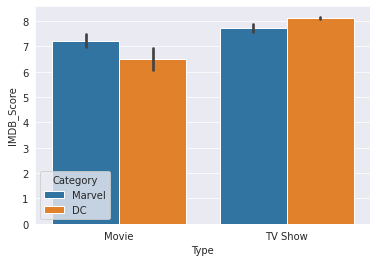

In [23]:
# Plot bar graph of Mean IMBD_score

sns.barplot(
    data=hero,
    x='Type',
    y='IMDB_Score',
    hue='Category',
    estimator=np.mean,
)



Interpretation: This graph tells us Marvel movies are better than DC movies. DC TV shows are better than Marvel TV shows 

### Barplot of Category, Type and mean RunTime

- The x-axis is `"Type"` which tells us if it is a series or movie
- The y-axis is `"RunTime"`
- The colour/hue should be `"Category"`, which tells if the film is DC or Marvel

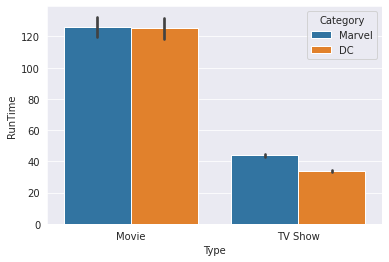

In [24]:
# Plot bar graph of mean RunTime

sns.barplot(
    data=hero,
    x='Type',
    y='RunTime',
    hue='Category',
    estimator=np.mean,
)


Interpretation: The first finding is that movies have a longer run time than TV shows. For Movies, Marvel and DC movies have the same run time. For TV shows, Marvel TV shows are longer than DC tv shows. 

### Barplot of Cateogry, Type and mean Metascore

- The x-axis is `"Type"` which tells us if it is a series or movie
- The y-axis is `"Metascore"`
- The colour/hue should be `"Category"`, which tells if the film is DC or Marvel

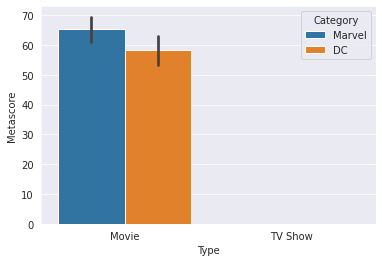

In [25]:
# Plot bar graph of mean Metascore

sns.barplot(
    data=hero,
    x='Type',
    y='Metascore',
    hue='Category',
    estimator=np.mean,
)

Interpretation: Marvel is way higher than DC in the movie rankings (Metacritic). The site does not collect TV show ratings.

### Barplot of Category and  total Votes

- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"Votes"`
- The colour/hue should be `"Type"` which tells us if it is a series or movie
- Make sure the esitmator is `np.sum`

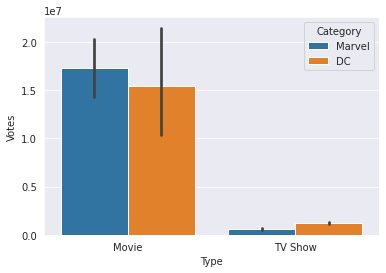

In [26]:
# Plot bar graph of total Votes
sns.barplot(
    data=hero,
    x='Type',
    y='Votes',
    hue='Category',
    estimator=np.sum,
)

Interpretion: Marvel movies get more votes than TV shows(because they are fun). Marvel has more total votes than DC when it comes to movies. DC has a littlemore votes than TV shows when it comes to TV showa. 

### Barplot of Category and  mean USA_Gross

- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"USA_Gross"`

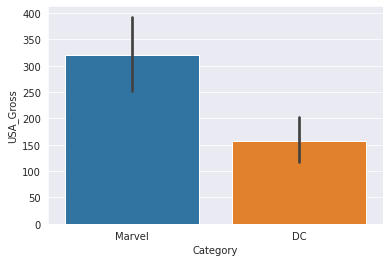

In [27]:
# Plot bar graph of mean USA_Gross
sns.barplot(
    data=hero,
    x='Category',
    y='USA_Gross',
    estimator=np.mean,
)

Interpretation: Marvel movies make more than DC movies

### Barplot of Genre, Type and  mean RunTime

- The x-axis is `"Genre"` which tells us if it is a series or movie
- The y-axis is `"RunTime"`
- The colour/hue should be `"Category"`, which tells if the film is DC or Marvel

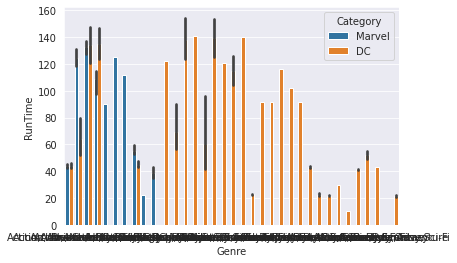

In [28]:
sns.barplot(
    data=hero,
    x='Genre',
    y='RunTime',
    hue='Category',
    estimator=np.mean,
)

Interpretation:

### Barplot of Rating and  mean IMBD_Score

- The x-axis is `"Rating"`, which tells if the film is DC or Marvel
- The y-axis is `"IMDB_Score"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie

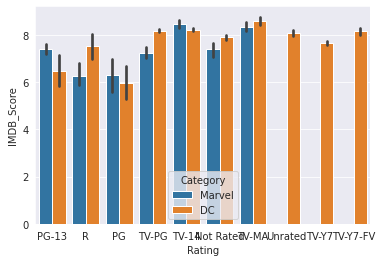

In [29]:
sns.barplot(
    data=hero,
    x='Rating',
    y='IMDB_Score',
    hue='Category',
    estimator=np.mean,
)

Interpretation: It shows us the different IMDB Scores for different age Ratings it compares Marvel and DC. for PG-13, Marvel Scores higher then DC, but for R, Rated movies DC Scores higher, for example, JOKER is an R Rated movie from DC in general Marvel movies tend to be more family friendly. 

## Scatter plots: Comparing two continuous variables using `sns.scatterplot()`

Scatter plots are used for **bivariate data (continous, continuous)**. There are ideal for understanding the relationship between two continuous variables, and help to visualize the degree of correlation between two variables. 

`sns.scatterplot()` is the name of the function that creates scatter plots. More documentation about it can be found at [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). 

For example:

```
sns.scatterplot(
    data=hero,
    x='x_axis_column_name',
    y='y_axis_column_name',
    hue='color_column_name',
    size='size_column_name',
)
```

### Relationship between Year_Start and IMDB_Score

- The x-axis is `"Year_Start"`, which tells if the film is DC or Marvel
- The y-axis is `"IMDB_Score"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie

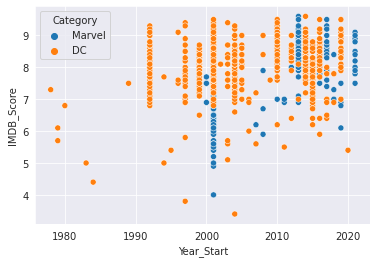

In [30]:
sns.scatterplot(
    data=hero,
    x='Year_Start',
    y='IMDB_Score',
    hue='Category'
)


Interpretation: they're everywhere (DC films are way older than Marvel films) in the early 2000's, marvel released tonnes of low rated films. in 2010 & beyond, we get more high rated films! 

### Relationship between IMBD and Metacritic Score

- The x-axis is `"IMBD_Score"`, which tells if the film is DC or Marvel
- The y-axis is `"Metascore"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie

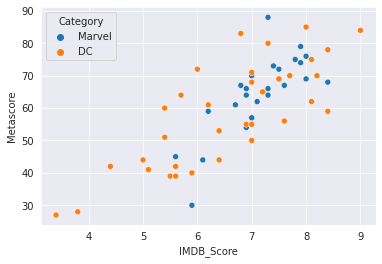

In [31]:
sns.scatterplot(
    data=hero,
    x='IMDB_Score',
    y='Metascore',
    hue='Category',
)


Interpretation:IMDB & metacritic scores are positively correlated. If a film is high on Metacrtitic, you score high on IMDB & vice versa!

### Relationship between IMBD Score and USA_Gross

- The x-axis is `"IMDB_Score"`, which tells if the film is DC or Marvel
- The y-axis is `"USA_Gross"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie
- The size should be the `"RunTime"` 

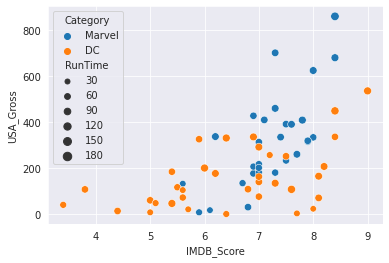

In [32]:
sns.scatterplot(
    data=hero,
    x='IMDB_Score',
    y='USA_Gross',
    hue='Category',
     size='RunTime'
)

Interpretation:Higher ratings are correlated to bigger profit. They also have a longer run time.

## Distribution Plots

Sometimes we want to see how are data are distributed or spread out. This is where distribution plots come in handy for **univariate, continuous** data.

There are several ways we can visualize the distribution of data, but here are four popular plots: 

1. **box plots**: used to determine the variation in your continuous data
2. **histograms**: used to visualize the frequency of our continuous variable within each predefined bins
3.  **density plots**: a version of histogram smoothened by Kernel density estimation.
4. **violin plots**: combined version of a box plot and density plot


### Box Plots (`sns.boxplot`)

Box plots are used to determine the variation in continuous data. In particular, they are often used to determine outliers.

A box plot is comprised of **(1) the box** and **(2) the whiskers**.

The **box part** of the plot is made up of three parts:

1. **Quartile 1 (Q1):** 25th percentile
2. **Quartile 2 (Q2)/Median:** The median or 50th percentile
3. **Quartile 3 (Q3):** 75th percentile

The **Interquantile Range (IQR)** is the difference between Q3 and Q1. It gives us a sense of the spread of the data.


The **whisker part** of the plot represents what is consider the borders (min and max) for outliers.

1. **min:** any values greater than this range are considered outliers
  - min = Q3 + 1.5*IQR
2. **max:** any values less than this range are considered outliers
  - max = Q1 + 1.5*IQR


![Box Plot](https://i.imgur.com/RcdP4kr.png)


`sns.boxplot` is the name of the function that creates these types of plots. More documentation about it can be found [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Example syntax:

```
sns.boxplot(
    data=hero,
    x='x_axis_column_name',
    y='y_axis_column_name',
    hue='color_column_name',
)
```

#### Distribution of US_Gross

- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"USA_Gross"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie`

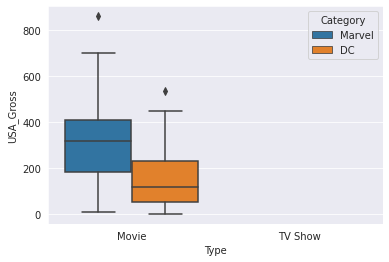

In [33]:
sns.boxplot(
    data=hero,
    x='Type',
    y='USA_Gross',
    hue="Category",
)

Interpretation: The median USA gross amount is higher for Marvel than DC. The marvel movies has a greater spread than DC.

### Histograms (`sns.histplot`)

Histograms are used to visualize the frequency of continuous variables in what are known as **bins**.

**Bins** 

A bin is an interval into which the dataset is divided. For example, if we have a range of values from 1-100, we can create bins of intervals of 20. So, we could have the first bin contain values from 1-20, the second 21-40, third 41-60, and so on until 100. This gives us an idea of how many of the values in a given data set fall within a certain range of values, i.e., the distribution of the data. Bins are usually equal in size, but do not necessarily have to be.

![histogram bins](https://i.imgur.com/hDfK8vE.png)


**Histogram Distributions**

Histograms give us greater insight into how our data are distributed. 

Here are some common distributions. Note that the peaks are revered to local maxima. 

![histogram distributions](https://i.imgur.com/ypLJkKJ.png)

`sns.histplot` is the name of the function that creates these types of plots. More documentation about it can be found [here](https://seaborn.pydata.org/generated/seaborn.histplot.html)


Example syntax:

```
sns.histplot(
    data=hero,
    x='x_axis_column_name', 
    hue='color_column_name',
)
```

There is no `y` parameter, beause the y-axis is by default the count.


#### Distribution of RunTime

- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"USA_Gross"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie`

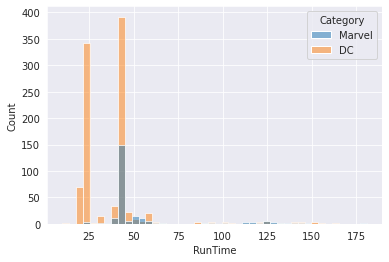

In [34]:
sns.histplot(
    data=hero,
    x='RunTime',
    hue="Category",
)

Interpretation: Run Time has a bimodal distribution. The different peak represent different types of content. We have 25 min TV shows and 45 min TV shows - as well as longer movies. 

### Density Plots (`sns.kdeplot`)

Density plots are similar to histograms but they use a kernal density estimate (usually gaussain) to smooth the plot.


`sns.kdeplot` is the name of the function that creates these types of plots. More documentation about it can be found [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Example syntax:

```
sns.kdeplot(
    data=hero,
    x='x_axis_column_name',
    hue='color_column_name',
)
```

There is no `y` parameter, beause the y-axis is by default the kernal density estimate.



#### Distribution of Votes

- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"Votes"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie`

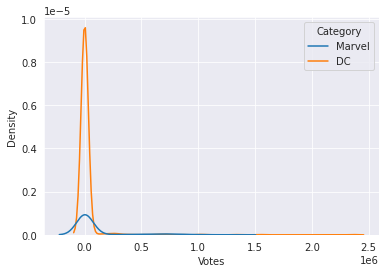

In [35]:
sns.kdeplot(
    data=hero,
    x='Votes',
    hue='Category',
)






Interpretation: Most of our data points have very few Votes 

### Violin Plots (`sns.violinplot`)

Violin plots are like if box plots and density plots had a baby. There great for showing distributions across different levels of categorical variables (e.g., like place of origin).


The middle bar of the box plot gives similar information as the boxplot. Whereas the "violin" portion of the box plot encodes information about distribution and skewness. 

![](https://i.imgur.com/PcGY1TK.png)

`sns.violinplot` is the name of the function that creates these types of plots. More documentation about it can be found [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Example syntax:

```
sns.violinplot(
    data=hero,
    x='x_axis_column_name',
    y='y_axis_column_name',
    hue='color_column_name',
)
```

Interpretation:

#### Distribution of IMDB_Score
- The x-axis is `"Category"`, which tells if the film is DC or Marvel
- The y-axis is `"IMDB_Score"`
- The colour/hue should be `"Category"` which tells us if it is a series or movie`

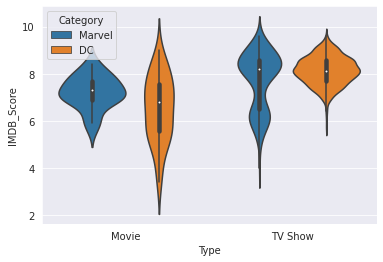

In [36]:
sns.violinplot(
    data=hero,
    x='Type',
    y='IMDB_Score',
    hue='Category',
)

Interpretation: 

For movies, marvel movies has a more narrow distribution when compared to DC movies. When looking at TV Shows, Marvel movies have a biomodal distribution -- there are movies that are highly rated and not so highly rated. DC TV shows have a unimodal modal distribution and are consistently good. 

# Machine Learning

## What is machine learning?

Machine learning isn't really a well defined term. There are, however, two defintions that are well accepted


### Arthur Samuel (1959)
    Field of study that gives computers the ability to learn without being explicitly programmed

### Tom Michel (1999)
    A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E

Watch this quick [video](https://www.youtube.com/watch?v=f_uwKZIAeM0) about machine learning.

## Types of Machine Learning
There are two major branches or machine learning that you different types of learning alorithms.

### 1. Supervised learning
We teach a computer how to do something, then let is use its new found knowledge to do it.

- supervised learning requires **labelled** data
- e.g., regression, classification

### 2. Unsupervised learning
We let the computer learn how to learn to do somethings, and use its knowledge to getermine structure and patterns in the data.

- unsupervised learning requested **unlabelled** data
- e.g., clustering


Regression

## Importing Machine Learning Libraries

There are some specialized libraries in python that we can use for machine learning.

### sklearn

[sklearn](https://scikit-learn.org/stable/) is a module of simple and efficient tools for machine learning problems like classification, regression and clustering. 

To import sklearn we use an import statement

```
    import sklearn
```

In particular, we want the `train_test_split` function, so we will import it this way

```
    from sklearn.model_selection import train_test_split
```

### statsmodels 

[statsmodels](https://www.statsmodels.org/stable/index.html) is a python module that provides class functions for many statistical models. Specifically, we are going to buse the [statsmodels.formula.api](https://www.statsmodels.org/stable/api.html?highlight=formula%20api#statsmodels-formula-api). This to long to type out, so we usually import and use the short for `smf`

To import statsmodels.formula.api we use and import statement

```
    import statsmodels.formula.api as smf 
```





In [37]:
# Lets import sklearn, along with our other data science packages

import numpy as np # For math- and matrix-based functions
import pandas as pd # For DataFrame functionality
import seaborn as sns # For plotting/ data visualization
from sklearn.model_selection import train_test_split # For the train_test_split_function
import statsmodels.formula.api as smf # Stats models for 

# Regression Analysis

Regression analysis attempts to explain the relationship between variables. We want to see if we can predict or explain the **dependent variable** using one or more **explanatory variables**. In linear regression, we assume that the dependent variable can be somewhat explained by a combination of expanatory variables.

A very simple example is one where the depedent variable is height and the explantatory variable is age. The age of a person does a good job of explaining their height for kids under 16. 

We can also think of **explanatory variables** as **features** in our linear model, and the **dependent variable** as the **target**.

The pipeline is as follows:
![image](https://i.imgur.com/tu0nVzO.png)

## Lets pick a model: 

**Dependent/Target Variable** = `"IMDB_Score"`

**Exploratory Variables/Features** = `["USA_Gross",  "RunTime", "Metascore"]`

In [38]:
# Define Variables
target = ["IMDB_Score"]
features = ["USA_Gross",  "RunTime", "Metascore", "Category"]

# Drop Data

hero_subset = hero[target + features].dropna()

In [39]:
hero_subset

,IMDB_Score,USA_Gross,RunTime,Metascore,Category
0,8.4,858.37,181.0,78.0,Marvel
1,8.0,333.18,121.0,76.0,Marvel
2,7.5,390.53,129.0,69.0,Marvel
3,7.9,315.06,130.0,74.0,Marvel
4,8.4,678.82,149.0,68.0,Marvel
...,...,...,...,...,...
264,3.4,40.20,104.0,27.0,DC
265,5.1,47.81,102.0,41.0,DC
266,5.7,20.99,91.0,64.0,DC
267,5.6,72.01,116.0,42.0,DC


### Lets plot the relationship between our target and each of our features using `sns.regplot()`

`sns.regplot()` plots the data as well as a linear regression fit. The syntax of this function is the same as all the other seaborn plots, but you can also take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)

### Feature_1 vs. Target 

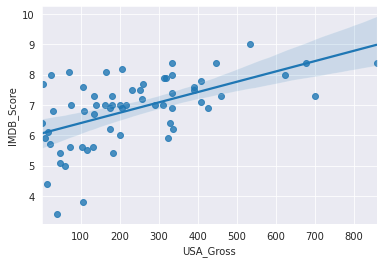

In [40]:
sns.regplot(
    data = hero_subset,
    x = "USA_Gross",
    y = "IMDB_Score"
    
)

### Feature_2 vs. Target 

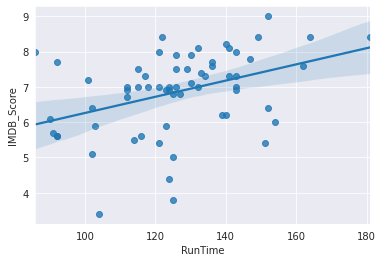

In [41]:
sns.regplot(
    data = hero_subset,
    x = "RunTime",
    y = "IMDB_Score"
)

### Feature_3 vs. Target 

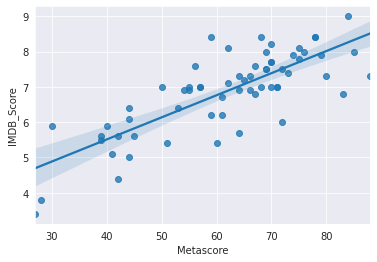

In [42]:
sns.regplot(
    data = hero_subset,
    x = "Metascore",
    y = "IMDB_Score"
)

## Splitting our data using `train_test_split()`

Whenever we do machine learning, we always want to reserve data to **train** the model as well as data to **test** the model.  By default, we usually use 75% (.75) of our data for training and 25% (.25) of our data for testing.  Testing our data allow us to see how good of a job our linear regression model does at predicting the target variable. 


We use `train_test_split()` to shuffle and randomly split our data into the train dataset and the test dataset.

Before we can use it, be sure to properly import it

```
    from sklearn.model_selection import train_test_split
```

The `train_test_split()` is formatted as follows:

```
    df_train, df_test = train_test_split(df[target], df[features], test_size=.25, train_size=.75, random_state=1)
```

- Where:
    - `df_train`: the split dataset for training
    - `df_test`: the split dataset for testing
    - `test_size`: the proportion of the data set to include in the testing set
    - `train_size`: the proportion of the data set to include in the training set
    - `random_state`: controls the shuffling of the data, using an int allows for reproducible output 

In [43]:
# Split the the car data into testing and training sets
hero_train, hero_test = train_test_split(hero_subset, test_size=.25, train_size=.75, random_state=1)


In [44]:
# The train dataset has 47 rows (notice how the indexes are randomly suffled)
hero_train

,IMDB_Score,USA_Gross,RunTime,Metascore,Category
3,7.9,315.06,130.0,74.0,Marvel
246,8.2,206.85,140.0,70.0,DC
242,7.0,291.05,143.0,55.0,DC
10,7.6,389.81,136.0,67.0,Marvel
261,5.6,104.30,92.0,39.0,DC
19,7.1,409.01,130.0,62.0,Marvel
240,8.4,448.14,164.0,78.0,DC
265,5.1,47.81,102.0,41.0,DC
17,7.3,180.20,117.0,64.0,Marvel
260,7.7,3.15,92.0,70.0,DC


In [45]:
# The test dataset has 16 rows (notice how the indexes are randomly suffled)
hero_test

,IMDB_Score,USA_Gross,RunTime,Metascore,Category
24,6.7,134.52,112.0,61.0,Marvel
245,8.1,164.62,141.0,75.0,DC
257,4.4,13.60,124.0,42.0,DC
27,5.6,131.92,92.0,45.0,Marvel
267,5.6,72.01,116.0,42.0,DC
2,7.5,390.53,129.0,69.0,Marvel
21,7.0,312.43,124.0,57.0,Marvel
248,7.5,251.19,126.0,69.0,DC
247,8.1,70.51,132.0,62.0,DC
250,3.8,107.33,125.0,28.0,DC


## Creating and Training our Linear Regression Machine Learning Model using `smf.ols()`

`smf.ols()` is the function we use to create a linear regression model.  OLS stands for ordinary least square models. 


It requires the following syntax

```
    model = smf.ols(formula="target ~ feature_1 + feature_2 + feature_3 + ... + feature_n", data=df).fit()
```

- where:
    - `formula`: the formula of the model as string in the format of `"target ~ feature_1 + feature_2 + feature_3 + ... + feature_n"`
        - The target and features are separated by `~`
        - The features are seprated by `+`
    - `data`: the name of your DataFrame
    - `.fit()`: is a function that trains the model to fit the data


This is the syntax of  `.predict()`:

- If we pass nothing into the model, it will return the prediction based on what is was trained on: 
```
        model.predict()
```
- If we our pass our testing_data or other new data, it will return the prediction for the testing/new data|
```
        model.predict(df_test)
```


In [46]:
# Lets create and train our model
hero_model = smf.ols(formula="IMDB_Score ~ USA_Gross + RunTime + Metascore + Category", data=hero_train,).fit()
hero_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     17.96
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.15e-08
Time:                        14:47:40   Log-Likelihood:                -45.315
No. Observations:                  47   AIC:                             100.6
Df Residuals:                      42   BIC:                             109.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.3714      0.804      4.192      0.000       1.748       4.995
Category[T.Marvel]     0.0738      0.223      0.330      0.743      -0.377       0.525
USA_Gross              0.0012      0.001      1.613      0.114      -0.000       0.003
RunTime                0.0026      0.007      0.398      0.692      -0.011       0.016
Metascore              0.0469      0.008      5.798      0.000       0.031       0.063
==============================================================================
Omnibus:                        1.913   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.145
Skew:                          -0.354   Prob(JB):                        0.564
Kurtosis:                       3.287   Cond. No.                     2.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Get prediciton from the linear model and make it a new colunn on the training DataFrame
hero_train['IMDB_Score_Prediction'] = hero_model.predict()

# Get the difference between the predicted and observed/actual value
hero_train['IMDB_Score_Difference'] = hero_train['IMDB_Score_Prediction']-hero_train['IMDB_Score']

# Show DataFrame
hero_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,IMDB_Score,USA_Gross,RunTime,Metascore,Category,IMDB_Score_Prediction,IMDB_Score_Difference
3,7.9,315.06,130.0,74.0,Marvel,7.640047,-0.259953
246,8.2,206.85,140.0,70.0,DC,7.273072,-0.926928
242,7.0,291.05,143.0,55.0,DC,6.679652,-0.320348
10,7.6,389.81,136.0,67.0,Marvel,7.418282,-0.181718
261,5.6,104.30,92.0,39.0,DC,5.568483,-0.031517
19,7.1,409.01,130.0,62.0,Marvel,7.191385,0.091385
240,8.4,448.14,164.0,78.0,DC,8.004687,-0.395313
265,5.1,47.81,102.0,41.0,DC,5.619732,0.519732
17,7.3,180.20,117.0,64.0,Marvel,6.972850,-0.327150
260,7.7,3.15,92.0,70.0,DC,6.899742,-0.800258


## Evaluating the Fit of the Model: Root Mean Squared Error (RMSE)

Root Mean Squared Error (RMSE) is used to assess how well a regression model first the dataset. It tells the average distance between the predicted values from the model and the actual/observed values. 

The formula for RMSE is as follows:

$$ 
RMSE =  \sqrt{\Sigma \frac{(P_{i} - O_{i})^2}{n}} 
$$

Where:
- $RMSE$ is root mean squared error
- $P$ is predicted value
- $O$ is observed/actual value
- $i$ is a single instance
- $n$ is the sample size


A lower RMSE indicates a better fitting model.
↓ RMSE = ↑ Fit

In [48]:
# Get sample size (n)
n = len(hero)

# Calculate RMSE
rmse_train = np.sqrt((hero_train['IMDB_Score_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the training data is {rmse_train}')

The RMSE of the training data is 0.12543098085424925


## Trying the model on the testing set

We need to test how our model performs on data it has never seen before. To do this we must again use `.predict()`

### Recall: 

This is the syntax of  `.predict()`:

- If we pass nothing into the model, it will return the prediction based on what is was trained on: 
```
        model.predict()
```
- If we our pass our testing_data or other new data, it will return the prediction for the testing/new data|
```
        model.predict(df_test)
```

In [49]:
# Get prediciton from the linear model and make it a new colunn on the training DataFrame
hero_test['IMDB_Score_Prediction'] = hero_model.predict(hero_test) # notice how we are passing the test data now, NOT train

# Get the difference between the predicted and observed/actual value
hero_test['IMDB_Score_Difference'] = hero_test['IMDB_Score_Prediction']- hero_test['IMDB_Score']

# Show DataFrame
hero_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,IMDB_Score,USA_Gross,RunTime,Metascore,Category,IMDB_Score_Prediction,IMDB_Score_Difference
24,6.7,134.52,112.0,61.0,Marvel,6.763461,0.063461
245,8.1,164.62,141.0,75.0,DC,7.458877,-0.641123
257,4.4,13.60,124.0,42.0,DC,5.682551,1.282551
27,5.6,131.92,92.0,45.0,Marvel,5.957387,0.357387
267,5.6,72.01,116.0,42.0,DC,5.732694,0.132694
2,7.5,390.53,129.0,69.0,Marvel,7.494681,-0.005319
21,7.0,312.43,124.0,57.0,Marvel,6.823630,-0.176370
248,7.5,251.19,126.0,69.0,DC,7.243495,-0.256505
247,8.1,70.51,132.0,62.0,DC,6.710975,-1.389025
250,3.8,107.33,125.0,28.0,DC,5.142409,1.342409


In [50]:
# Get sample size (n)
n = len(hero_test)

# Calculate RMSE
rmse_test = np.sqrt((hero_test['IMDB_Score_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the testing data is {rmse_test}')

The RMSE of the testing data is 0.7437921671946923


## Using the model to predict new scenerios. 

The RMSE values of the **machine learning model to predict IMDB_Scores from Votes, Metascore and USA_Gross** are pretty low.

### On the training set, the model had an RMSE value of  0.125
- So on average, the model got the IMDB score correct within a range of 0.125 rating points.  So instead of guessing a rating of 6, our model might guess 6.125 instead. 

### On the testing set, the model had an RMSE value of  0.745
- So on average, the model got the IMDB score was typically off by 0.745 points. So instead of guessing a score of 8.745, our model might guess 8 instead. 
- We expect the model to perform worse on the the testing set, because it has not yet seen that data
- It's like taking a test where you've seen all the answers versus taking a test where you haven't yet seen the answers.


### Confidence in model and sample size
Being less than one rating point off, doesn't seem to bad for our model. If we had a larger sample size (i.e., more data points), the machine learning model can better at learning and our error would be less. But, for now lets say we have confidence in this model







### Create a new data frame of our predicted data

First we must create a DataFrame that has the the exact same column names (case-senstive) as our feature columns. We will be creating a DataFrame using the dictionary method. Please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas).
DataFrame.from_dict.html) for more details.

If we have confidence in our model we can use machine learning to predict the IMDB_score for new scenerios

#### Lets say we want estimate the IMDB rating (`"IMDB_Score"`) of for two movies that havent yet been added to IMDB website.

**Attack of the NarWolves**
- USA_Gross of  $ 600 M
- RunTime of 120 minutes
- Metascore of 80 
- DC

**Teeth or Horns?**
- USA_Gross of  $ 400 M
- RunTime of 90 minutes
- Metascore of 60 
- Marvel


In [51]:
# Create new_predictio DataFrame
new_prediction = pd.DataFrame({
    "Name": ["Attack of the NarWolves", "Teeth or Horns?"],
    "USA_Gross": [600, 400],
    "RunTime": [120, 90],
    "Metascore": [80, 60],
    "Category": ["DC", "Marvel"],
})

# Show DataFrame
new_prediction

,Name,USA_Gross,RunTime,Metascore,Category
0,Attack of the NarWolves,600,120,80,DC
1,Teeth or Horns?,400,90,60,Marvel


In [52]:
# Lets use our model to predict the scores
new_prediction["IMDB_Score"] = hero_model.predict(new_prediction)

# Show DataFrame
new_prediction

,Name,USA_Gross,RunTime,Metascore,Category,IMDB_Score
0,Attack of the NarWolves,600,120,80,DC,8.168216
1,Teeth or Horns?,400,90,60,Marvel,6.982005
